# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

# Notations

In `class_sz`, we use $\mathrm{Mpc}/h$ units.

Let us denote the angular diameter distance $D_A$.

Then, the comoving (or coordinate) distance $\chi$ is given by:

$$\chi = D_A(1+z)$$ 

Note that in the flat case, this is also the conformal distance. 


## Definition
The comoving distance is the distance traveled by light starting its journey from redshift $z$. We have 

$$\chi(z) = \int_0^z \frac{d z^\prime}{H(z^\prime)}.$$

For further details, we refer to Chapter 2 of [Dodelson \& Schmidt (2021)](https://www.sciencedirect.com/book/9780128159484/modern-cosmology). 


## Comvong volume

An important quantity for LSS calculations is the comvong volume,

$$ \frac{dV}{dz} = \frac{c\chi^2}{H}.$$

# Calculation

In [3]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_chi':0,
})

CPU times: user 262 µs, sys: 50 µs, total: 312 µs
Wall time: 323 µs


True

In [4]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 73.7 ms, sys: 13.3 ms, total: 86.9 ms
Wall time: 28.6 ms


In [5]:
z = 1.
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

array(3395.85984044)

Update cosmological parameters and recompute

In [6]:
cosmo_params.update({'omega_cdm':  0.11833})
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

array(3400.19020927)

Time calculation after initialization

In [7]:
# 50 loops 10 runs
%timeit -n 50 -r 10 classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

6.54 ms ± 1.05 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


# Plot distance

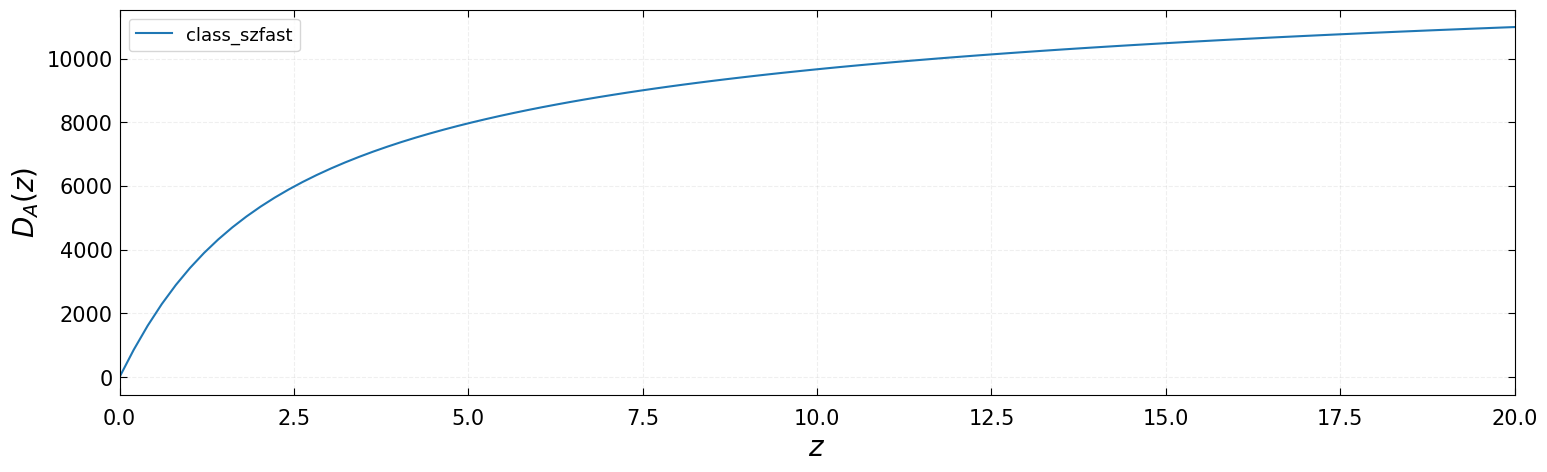

In [8]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


z = np.linspace(0.,20,100)

ax.plot(z,classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params),ls='-',label='class_szfast')






ax.set_ylabel(r"$D_A(z)$",size=title_size)
ax.set_xlabel(r"$z$",size=title_size)
ax.set_xscale('linear')
ax.set_xlim(0,20)
ax.legend(fontsize=legend_size)



# Time computations of $D_A(z)$

Initialization

In [9]:
%timeit -n 50 -r 10 classy_sz.compute_class_szfast()

The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
11.5 ms ± 6.53 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


In [10]:
z = np.linspace(0.,20,1000)
%timeit -n 50  -r 10 classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

6.07 ms ± 435 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


# Compute with Jax

In [1]:
from classy_sz import Class as Class_sz
import jax.numpy as jnp

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

In [2]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'jax' : 1,
})

CPU times: user 616 µs, sys: 428 µs, total: 1.04 ms
Wall time: 1.06 ms


True

In [4]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 216 ms, sys: 23 ms, total: 239 ms
Wall time: 249 ms


In [5]:
z = 1.
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

Array(3395.85984044, dtype=float64)

In [6]:
cosmo_params.update({'omega_cdm':  0.11833})
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

Array(3400.19020927, dtype=float64)

In [7]:
z = jnp.linspace(1.,20,1000)
"%.25f"%classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)[0]

'3400.1902092696091131074354053'

In [8]:
cosmo_params.update({'omega_cdm':  0.11933})
z = jnp.linspace(1.,20,1000)
"%.25f"%classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)[0]

'3395.8598404409026443317998201'

## Compatibility

In [32]:

import jax

z = jnp.linspace(1., 20, 1000)
daz_values = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

# Check if it's a JAX array
is_jax_array = isinstance(daz_values, jnp.ndarray)

# Additional check: apply a JAX function to see if it supports JAX transformations
try:
    jitted_hubble = jax.jit(classy_sz.get_angular_distance_at_z)(z,params_values_dict = cosmo_params)
    supports_jit = True
except Exception as e:
    supports_jit = False
    print("Error with jax.jit:", e)

print("Is D_A(z) a JAX array?", is_jax_array)
print("Does D_A(z) support JAX jit?", supports_jit)


Is D_A(z) a JAX array? True
Does D_A(z) support JAX jit? True


In [34]:
daz_values = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
is_jax_array = isinstance(daz_values, jnp.ndarray)
print("Is get_hubble_at_z a JAX array?", is_jax_array)

Is get_hubble_at_z a JAX array? True


## Gradients

### 1 dimension

At one redshift

In [37]:
z = 1.
def DA(H0):
    cosmo_params.update({'H0':H0})
    daz = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return daz

In [38]:
DA(72)

Array(3261.77043792, dtype=float64)

In [39]:
from jax import grad
# Get the derivative of f with respect to p
dDA = grad(DA)

In [41]:
dDA(76.)

Array(-28.00988444, dtype=float64, weak_type=True)

In [46]:
import numpy as np
h = np.geomspace(1e-10, 1e-1,50)
dfunc = [(DA(76.+hp)-DA(76))/hp for hp in h]
jaxdDA = dDA(76.)

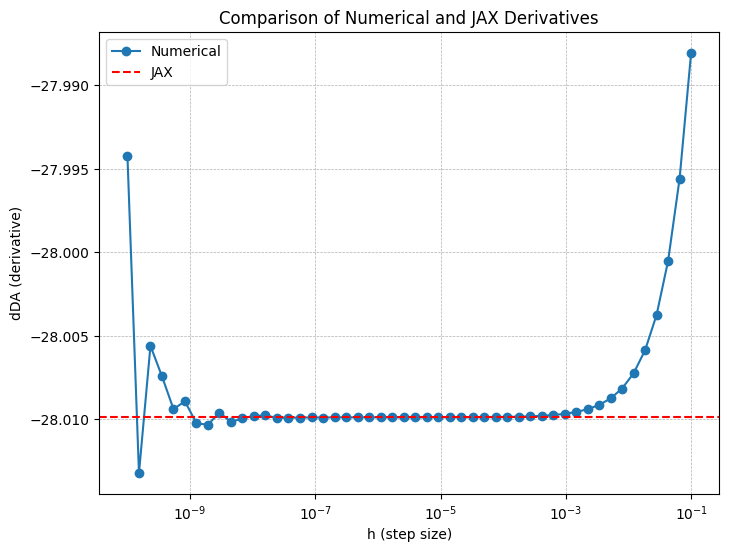

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(h, dfunc, label='Numerical', linestyle='-', marker='o')  # Line plot for 'numerical'
plt.axhline(y=jaxdDA, label='JAX', color='r', linestyle='--')   # Horizontal line for 'jax'

# Logarithmic scale for x-axis
plt.xscale('log')

# Axis labels and title
plt.xlabel('h (step size)')
plt.ylabel('dDA (derivative)')
plt.title('Comparison of Numerical and JAX Derivatives')

# Thin grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Display plot
plt.show()


On a redshift grid

In [48]:
from jax import jacrev, jacfwd
z = jnp.linspace(1., 20, 10)

def DA(H0):
    cosmo_params.update({'H0':H0})
    daz = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return daz

In [49]:
dDA = jacrev(DA)

In [50]:
%timeit -n 100 dDA(72.)

30.6 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
dDA = jacfwd(DA)

In [52]:
%timeit -n 100 dDA(72.)

21.4 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Forward mode is faster. 

### > 1 dimension

At one redshift

In [53]:
z = 1.
def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

In [54]:
DA(72,0.11833)

Array(3265.68621624, dtype=float64)

In [55]:
from jax import jacfwd
# Get the derivative of f with respect to p
dHubble = jacfwd(DA,argnums=(0,1))

In [56]:
dHubble(76.,0.11933)

(Array(-28.00988444, dtype=float64), Array(-3566.86896264, dtype=float64))

On a redshift grid

In [61]:
z = jnp.linspace(1., 20, 10)

def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

In [62]:
DA(72,0.11833)

Array([ 3265.68621624,  6459.04386645,  7913.84292157,  8778.88579131,
        9366.94472565,  9800.10231108, 10135.80881894, 10405.92581968,
       10629.32692372, 10818.21306446], dtype=float64)

In [63]:
dDA = jacfwd(DA,argnums=(0,1))

In [64]:
dDA(76.,0.11933)

(Array([-28.00988444, -35.3761588 , -35.99646745, -36.13316364,
        -36.16474111, -36.19270224, -36.19430307, -36.1916084 ,
        -36.18467547, -36.1878598 ], dtype=float64),
 Array([ -3566.86896264, -12667.36882233, -17570.04730651, -20562.62816898,
        -22600.60364827, -24115.69587157, -25281.82619285, -26219.26756952,
        -26992.8587649 , -27652.0502123 ], dtype=float64))

## Gradient surface

Sample code

In [65]:
prior_H0 = (40,100)
prior_omega_cdm = (0.08,0.2)


z = 1
def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

dDA = jacfwd(DA,argnums=(0,1))

# one value: 

dDA(76.,0.11933)

(Array(-28.00988444, dtype=float64), Array(-3566.86896264, dtype=float64))

Full grid

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from jax import jacfwd
import classy_sz  # Assuming classy_sz is properly imported and available

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_hubble':0,
'jax' : 1,
})

classy_sz.compute_class_szfast()

# Set up prior ranges
prior_H0 = (40, 100)
prior_omega_cdm = (0.08, 0.2)

# Create meshgrid for H0 and omega_cdm
H0_vals = np.linspace(prior_H0[0], prior_H0[1], 100)
omega_cdm_vals = np.linspace(prior_omega_cdm[0], prior_omega_cdm[1], 100)
H0_grid, omega_cdm_grid = np.meshgrid(H0_vals, omega_cdm_vals)

# Define cosmology parameters and set redshift
z = 1

# Define function to get DA
def DA(H0, omega_cdm):
    cosmo_params.update({'H0': H0, 'omega_cdm': omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z, params_values_dict=cosmo_params)
    return result

# Calculate derivatives with respect to H0 and omega_cdm
dDA = jacfwd(DA, argnums=(0, 1))

# Initialize arrays to store derivative values
dDA_dH0_values = np.zeros_like(H0_grid)
dDA_domega_cdm_values = np.zeros_like(omega_cdm_grid)


In [70]:
%%time
# Evaluate derivatives over the grid
for i in range(H0_grid.shape[0]):
    for j in range(H0_grid.shape[1]):
        dH0, domega_cdm = dDA(H0_grid[i, j], omega_cdm_grid[i, j])
        dDA_dH0_values[i, j] = dH0
        dDA_domega_cdm_values[i, j] = domega_cdm

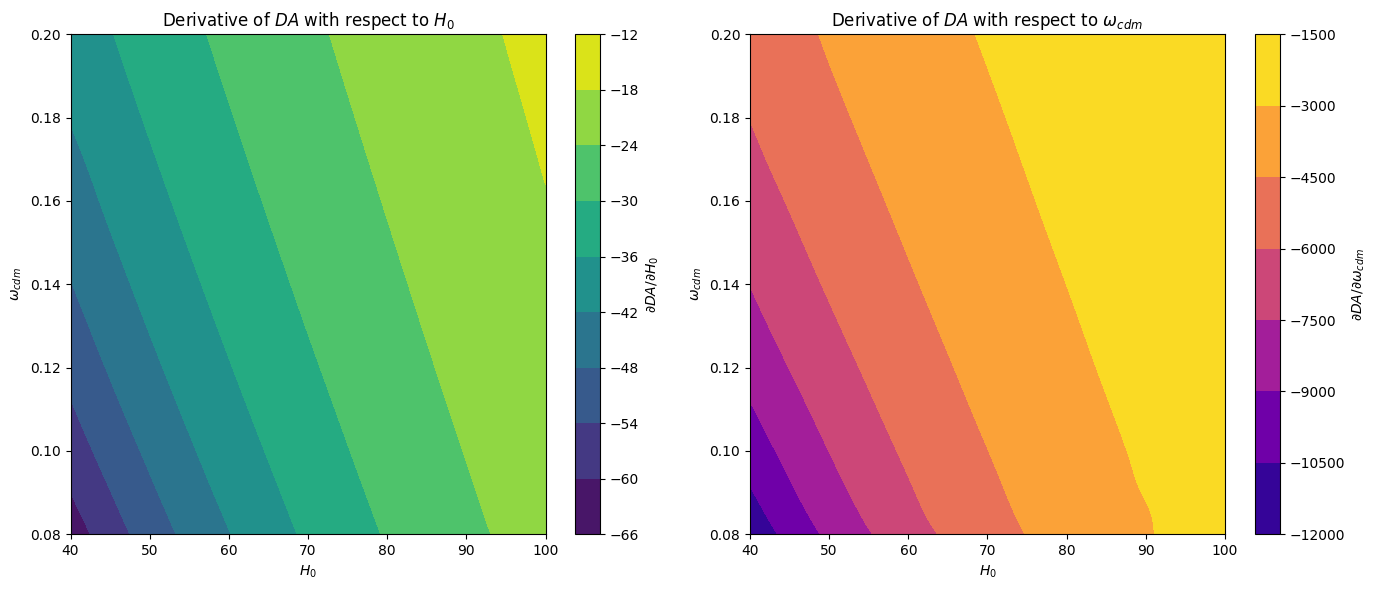

In [71]:

# Plotting
plt.figure(figsize=(14, 6))

# First plot: Derivative with respect to H0
plt.subplot(1, 2, 1)
plt.contourf(H0_grid, omega_cdm_grid, dDA_dH0_values, cmap='viridis')
plt.colorbar(label=r'$\partial DA / \partial H_0$')
plt.xlabel(r'$H_0$')
plt.ylabel(r'$\omega_{cdm}$')
plt.title(r'Derivative of $DA$ with respect to $H_0$')

# Second plot: Derivative with respect to omega_cdm
plt.subplot(1, 2, 2)
plt.contourf(H0_grid, omega_cdm_grid, dDA_domega_cdm_values, cmap='plasma')
plt.colorbar(label=r'$\partial DA / \partial \omega_{cdm}$')
plt.xlabel(r'$H_0$')
plt.ylabel(r'$\omega_{cdm}$')
plt.title(r'Derivative of $DA$ with respect to $\omega_{cdm}$')

plt.tight_layout()
plt.show()